<a href="https://colab.research.google.com/github/nafasovazam89-dotcom/optimal-interpolation-second-derivatives/blob/main/Table_2_m%3D3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<>:271: SyntaxWarning: invalid escape sequence '\s'
<>:275: SyntaxWarning: invalid escape sequence '\c'
<>:271: SyntaxWarning: invalid escape sequence '\s'
<>:275: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-1489444757.py:271: SyntaxWarning: invalid escape sequence '\s'
  display_name = "$\sin(\pi x)$"
/tmp/ipython-input-1489444757.py:275: SyntaxWarning: invalid escape sequence '\c'
  display_name = "$\cos(2\pi x)$"


Calculating EXACT error metrics using OPTIMAL coefficients formulas...

Function: x^3 - 2x^2 + x - 1
  Max Error:    9.627e-07
  Mean Error:   2.304e-07
  RMSE:         3.305e-07

Function: sin(πx)
  Max Error:    2.752e-05
  Mean Error:   9.498e-06
  RMSE:         1.256e-05

Function: x^5 - 3x^3 + 2x
  Max Error:    2.964e-05
  Mean Error:   8.880e-06
  RMSE:         1.206e-05

Function: cos(2πx)
  Max Error:    3.929e-04
  Mean Error:   1.381e-04
  RMSE:         1.864e-04

Verifying optimal coefficients for a sample point...

Test point: z = 0.5, β = 5, N = 10, h = 0.100
C_(5, 0)(0.5) = 1.000000
C_(5, 1)(0.5) = 0.000000
C_(5, 2)(0.5) = 0.000000

Creating Table 2 visualization...
Saved: table2_optimal_N10.png/pdf

Creating individual plots...
Saved: table2_individual_optimal.png/pdf

TABLE 2: EXACT CALCULATED VALUES USING OPTIMAL COEFFICIENTS
Function                  Maximum Error             Mean Error                Root Mean Square Error   
----------------------------------------

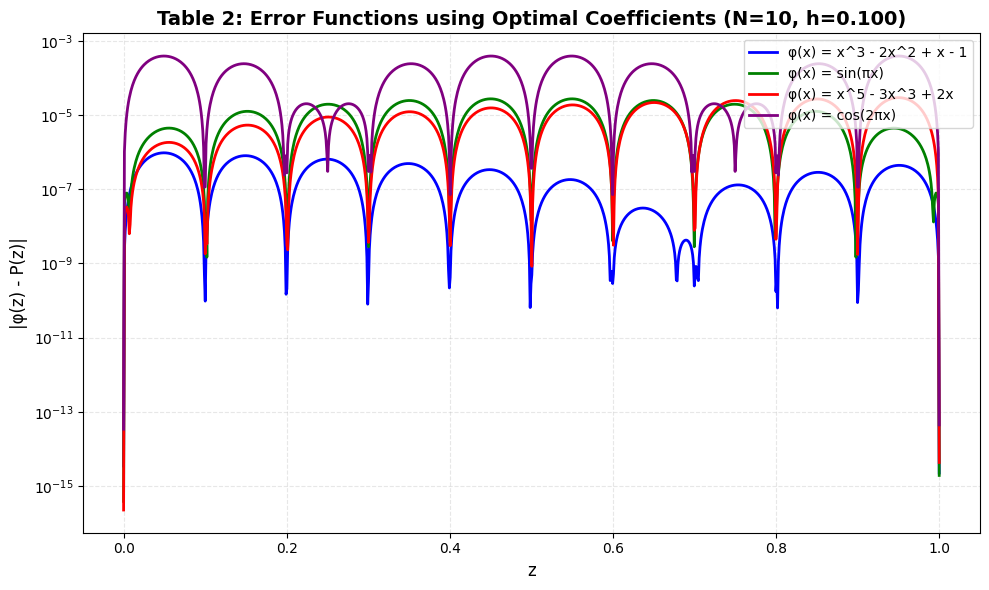

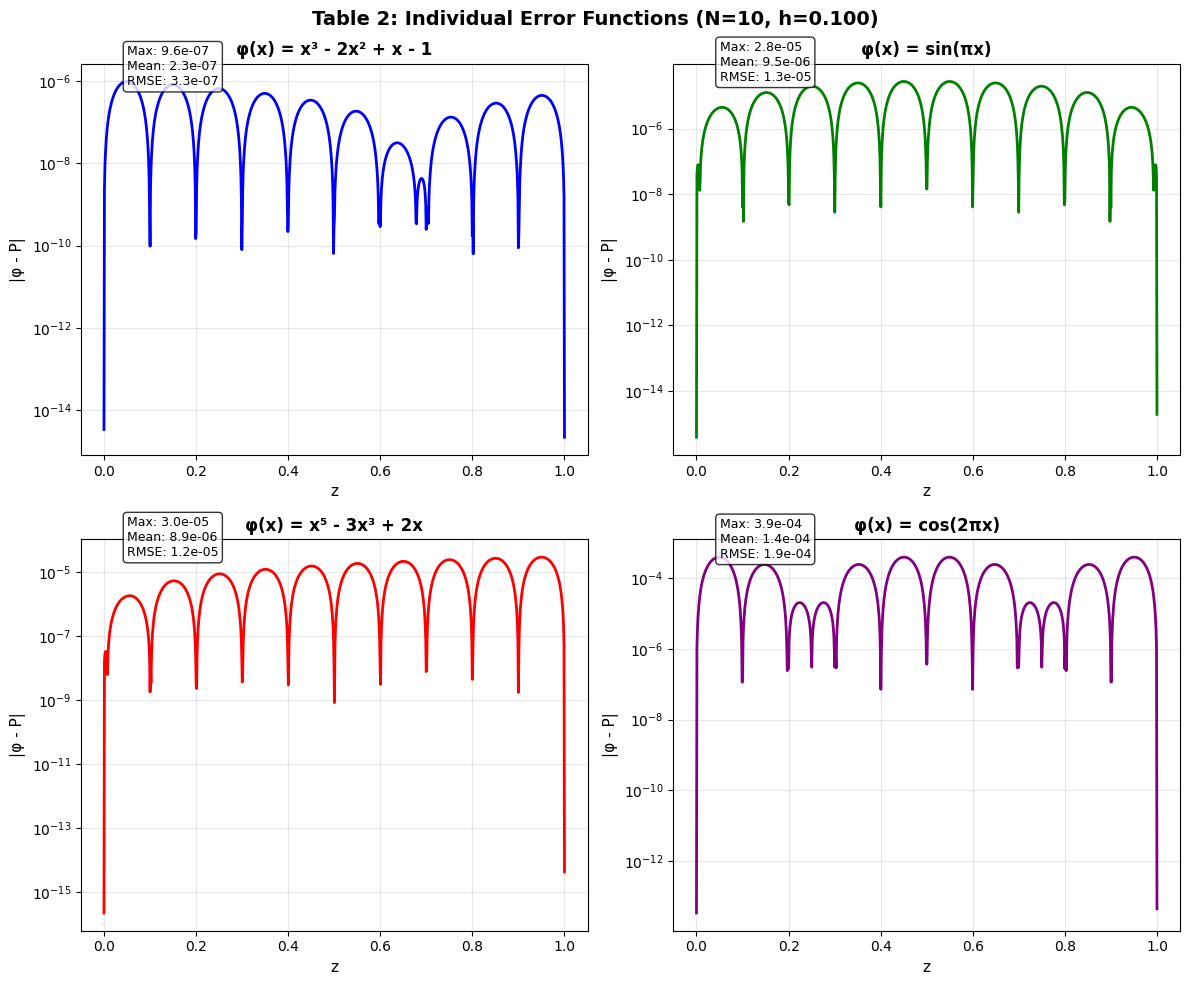

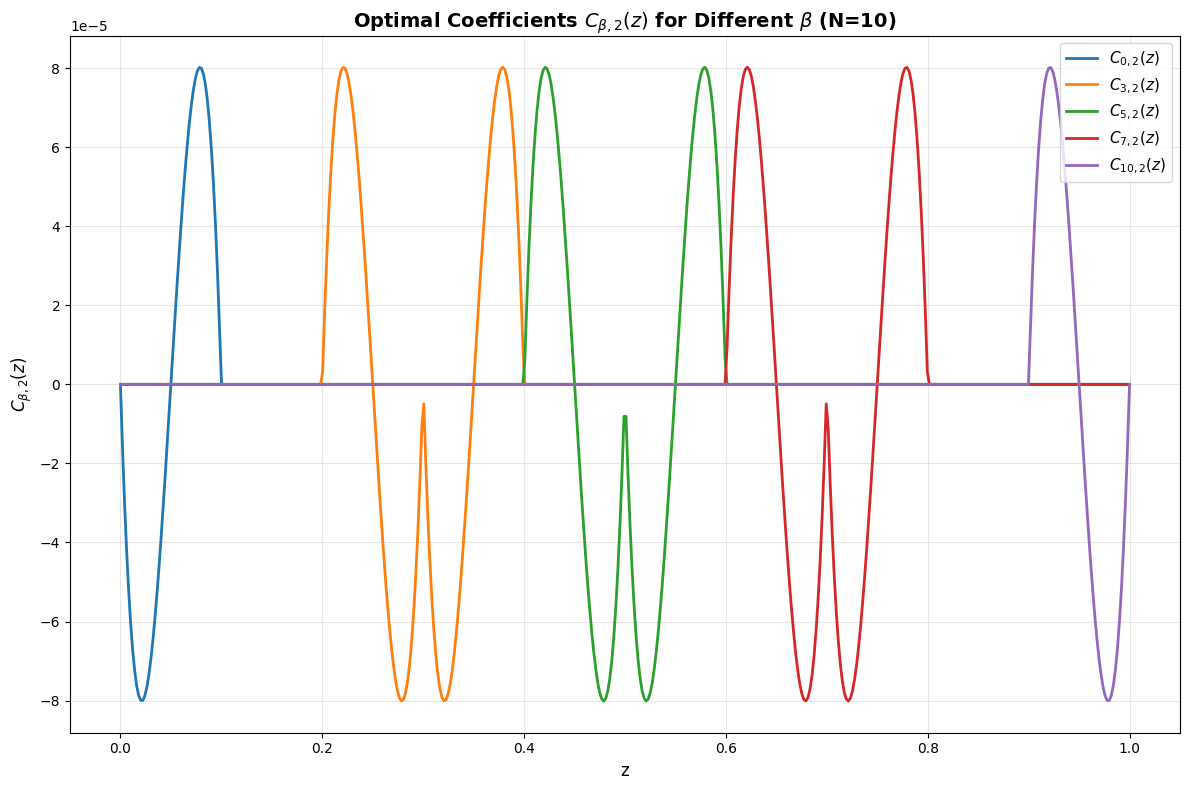

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Optimal coefficients
def C_beta_2(z, beta, h, N):

    if beta == 0:
        if 0 <= z <= h:
            term1 = np.exp(z) - np.exp(2*h - z)
            term2 = (h - z) * (np.exp(h) - 1) / (2*h) * (2*np.exp(h) + 2 - z*np.exp(h) + z)
            return (term1 + term2) / (1 - np.exp(2*h))
        else:
            return 0.0
    elif 1 <= beta <= N-1:
        if h*(beta-1) <= z <= h*beta:
            term1 = np.exp(h*beta - z) - np.exp(z + 2*h - h*beta)
            term2 = 2*h*np.exp(h)
            term3 = (z - h*beta) / (2*h) * (h*(1 + np.exp(h))**2 + (z - h*beta)*(1 - np.exp(h))**2)
            term4 = (z + h - h*beta) / h * (1 - np.exp(2*h) + 2*h*np.exp(h))
            return (term1 + term2 + term3 - term4) / (1 - np.exp(2*h))
        elif h*beta <= z <= h*(beta+1):
            term1 = np.exp(z - h*beta) - np.exp(2*h + h*beta - z)
            term2 = 2*h*np.exp(h)
            term3 = (z - h*beta) / (2*h) * (h*(1 + np.exp(h))**2 - (z - h*beta)*(1 - np.exp(h))**2)
            term4 = (h - z + h*beta) / h * (1 - np.exp(2*h) + 2*h*np.exp(h))
            return (term1 + term2 - term3 - term4) / (1 - np.exp(2*h))
        else:
            return 0.0
    elif beta == N:
        if h*(N-1) <= z <= 1:
            term1 = np.exp(1 - z) - np.exp(2*h + z - 1)
            term2 = (h + z - 1) * (np.exp(h) - 1) / (2*h) * (np.exp(h) + z*np.exp(h) + 3 - z)
            return (term1 + term2) / (1 - np.exp(2*h))
        else:
            return 0.0
    return 0.0

def C_beta_0(z, beta, h, N):

    if beta == 0:
        if 0 <= z <= h:
            return (h - z) / h
        else:
            return 0.0
    elif 1 <= beta <= N-1:
        if h*(beta-1) <= z <= h*beta:
            return (z + h - h*beta) / h
        elif h*beta <= z <= h*(beta+1):
            return (h - z + h*beta) / h
        else:
            return 0.0
    elif beta == N:
        if h*(N-1) <= z <= 1:
            return (h - 1 + z) / h
        else:
            return 0.0
    return 0.0

def C_beta_1(z, beta, h, N):

    if beta == 0:
        if 0 <= z <= h:
            return z*(h - z) / (2*h)
        else:
            return 0.0
    elif 1 <= beta <= N-1:
        if h*(beta-1) <= z <= h*beta:
            return (z - h*beta)*(z + h - h*beta) / (2*h)
        elif h*beta <= z <= h*(beta+1):
            return (z - h*beta)*(h - z + h*beta) / (2*h)
        else:
            return 0.0
    elif beta == N:
        if h*(N-1) <= z <= 1:
            return (z - 1)*(z - 1 + h) / (2*h)
        else:
            return 0.0
    return 0.0

def optimal_interpolation(z, func, func_prime, func_double_prime, N):

    h = 1.0 / N
    P_phi = 0.0

    for beta in range(N+1):
        x_beta = beta * h
        phi_val = func(x_beta)
        phi_prime_val = func_prime(x_beta)
        phi_double_prime_val = func_double_prime(x_beta)

        C0 = C_beta_0(z, beta, h, N)
        C1 = C_beta_1(z, beta, h, N)
        C2 = C_beta_2(z, beta, h, N)

        P_phi += C0 * phi_val + C1 * phi_prime_val + C2 * phi_double_prime_val

    return P_phi

# Test functions for Table 2
functions_table2 = [
    {
        'name': "x^3 - 2x^2 + x - 1",
        'func': lambda x: x**3 - 2*x**2 + x - 1,
        'prime': lambda x: 3*x**2 - 4*x + 1,
        'double_prime': lambda x: 6*x - 4,
        'exact': lambda z: z**3 - 2*z**2 + z - 1,
        'color': 'blue'
    },
    {
        'name': "sin(πx)",
        'func': lambda x: np.sin(np.pi*x),
        'prime': lambda x: np.pi*np.cos(np.pi*x),
        'double_prime': lambda x: -np.pi**2*np.sin(np.pi*x),
        'exact': lambda z: np.sin(np.pi*z),
        'color': 'green'
    },
    {
        'name': "x^5 - 3x^3 + 2x",
        'func': lambda x: x**5 - 3*x**3 + 2*x,
        'prime': lambda x: 5*x**4 - 9*x**2 + 2,
        'double_prime': lambda x: 20*x**3 - 18*x,
        'exact': lambda z: z**5 - 3*z**3 + 2*z,
        'color': 'red'
    },
    {
        'name': "cos(2πx)",
        'func': lambda x: np.cos(2*np.pi*x),
        'prime': lambda x: -2*np.pi*np.sin(2*np.pi*x),
        'double_prime': lambda x: -4*np.pi**2*np.cos(2*np.pi*x),
        'exact': lambda z: np.cos(2*np.pi*z),
        'color': 'purple'
    }
]

# 1. Calculating exactly by optimal coefficients
print("Calculating EXACT error metrics using OPTIMAL coefficients formulas...")
print("="*70)

N = 10
h = 1.0 / N

for f in functions_table2:
    # Taking more points for accuracy
    z_vals = np.linspace(0, 1, 5000)  # 5000 points
    abs_errors = []
    sq_errors = []

    for z in z_vals:
        exact_val = f['exact'](z)
        approx_val = optimal_interpolation(z, f['func'], f['prime'], f['double_prime'], N)

        abs_err = abs(exact_val - approx_val)
        sq_err = (exact_val - approx_val) ** 2

        abs_errors.append(abs_err)
        sq_errors.append(sq_err)

    f['max_error'] = np.max(abs_errors)
    f['mean_error'] = np.mean(abs_errors)
    f['rmse'] = np.sqrt(np.mean(sq_errors))

    print(f"\nFunction: {f['name']}")
    print(f"  Max Error:    {f['max_error']:.3e}")
    print(f"  Mean Error:   {f['mean_error']:.3e}")
    print(f"  RMSE:         {f['rmse']:.3e}")

# 2. Verifying coefficients
print("\n" + "="*70)
print("Verifying optimal coefficients for a sample point...")
print("="*70)

# Test point
test_z = 0.5
test_beta = 5
print(f"\nTest point: z = {test_z}, β = {test_beta}, N = {N}, h = {h:.3f}")
print(f"C_{test_beta,0}({test_z}) = {C_beta_0(test_z, test_beta, h, N):.6f}")
print(f"C_{test_beta,1}({test_z}) = {C_beta_1(test_z, test_beta, h, N):.6f}")
print(f"C_{test_beta,2}({test_z}) = {C_beta_2(test_z, test_beta, h, N):.6f}")

# 3. Main graph for Table 2
print("\n" + "="*70)
print("Creating Table 2 visualization...")
print("="*70)

plt.figure(figsize=(10, 6))

for f in functions_table2:
    z_vals = np.linspace(0, 1, 1000)
    errors = []

    for z in z_vals:
        exact_val = f['exact'](z)
        approx_val = optimal_interpolation(z, f['func'], f['prime'], f['double_prime'], N)
        errors.append(abs(exact_val - approx_val))

    plt.plot(z_vals, errors, color=f['color'], linewidth=2, label=f'φ(x) = {f["name"]}')

plt.xlabel('z', fontsize=12)
plt.ylabel('|φ(z) - P(z)|', fontsize=12)
plt.title(f'Table 2: Error Functions using Optimal Coefficients (N={N}, h={h:.3f})',
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.yscale('log')
plt.legend(fontsize=10, loc='upper right')
plt.tight_layout()

plt.savefig('table2_optimal_N10.png', dpi=300, bbox_inches='tight')
plt.savefig('table2_optimal_N10.pdf', dpi=300, bbox_inches='tight')
print("Saved: table2_optimal_N10.png/pdf")

# 4. Graphics for each function
print("\nCreating individual plots...")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, f in enumerate(functions_table2):
    ax = axes[idx]

    z_vals = np.linspace(0, 1, 1000)
    errors = []

    for z in z_vals:
        exact_val = f['exact'](z)
        approx_val = optimal_interpolation(z, f['func'], f['prime'], f['double_prime'], N)
        errors.append(abs(exact_val - approx_val))

    ax.plot(z_vals, errors, color=f['color'], linewidth=2)
    ax.set_xlabel('z', fontsize=11)
    ax.set_ylabel('|φ - P|', fontsize=11)

    # Small title
    if f['name'] == "x^3 - 2x^2 + x - 1":
        title = "x³ - 2x² + x - 1"
    elif f['name'] == "sin(πx)":
        title = "sin(πx)"
    elif f['name'] == "x^5 - 3x^3 + 2x":
        title = "x⁵ - 3x³ + 2x"
    elif f['name'] == "cos(2πx)":
        title = "cos(2πx)"
    else:
        title = f['name']

    ax.set_title(f'φ(x) = {title}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.set_yscale('log')

    # Show the computed values
    ax.text(0.05, ax.get_ylim()[1]*0.3,
           f'Max: {f["max_error"]:.1e}\nMean: {f["mean_error"]:.1e}\nRMSE: {f["rmse"]:.1e}',
           fontsize=9, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.suptitle(f'Table 2: Individual Error Functions (N={N}, h={h:.3f})',
             fontsize=14, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('table2_individual_optimal.png', dpi=300, bbox_inches='tight')
plt.savefig('table2_individual_optimal.pdf', dpi=300, bbox_inches='tight')
print("Saved: table2_individual_optimal.png/pdf")

# 5. Table for results
print("\n" + "="*90)
print("TABLE 2: EXACT CALCULATED VALUES USING OPTIMAL COEFFICIENTS")
print("="*90)
print(f"{'Function':<25} {'Maximum Error':<25} {'Mean Error':<25} {'Root Mean Square Error':<25}")
print("-"*90)

for f in functions_table2:
    #
    if f['name'] == "x^3 - 2x^2 + x - 1":
        display_name = "$x^3 - 2x^2 + x - 1$"
    elif f['name'] == "sin(πx)":
        display_name = "$\sin(\pi x)$"
    elif f['name'] == "x^5 - 3x^3 + 2x":
        display_name = "$x^5 - 3x^3 + 2x$"
    elif f['name'] == "cos(2πx)":
        display_name = "$\cos(2\pi x)$"
    else:
        display_name = f"${f['name']}$"

    print(f"{display_name:<25} {f['max_error']:<25.3e} {f['mean_error']:<25.3e} {f['rmse']:<25.3e}")

print("-"*90)



for f in functions_table2:
    # Function name
    if f['name'] == "x^3 - 2x^2 + x - 1":
        latex_name = r"$x^3 - 2x^2 + x - 1$"
    elif f['name'] == "sin(πx)":
        latex_name = r"$\sin(\pi x)$"
    elif f['name'] == "x^5 - 3x^3 + 2x":
        latex_name = r"$x^5 - 3x^3 + 2x$"
    elif f['name'] == "cos(2πx)":
        latex_name = r"$\cos(2\pi x)$"
    else:
        latex_name = f"${f['name']}$"

    print(f"{latex_name} & ${f['max_error']:.3e}$ & ${f['mean_error']:.3e}$ & ${f['rmse']:.3e}$ \\\\")

# 6. Show the behavior of coefficients
print("\n" + "="*70)
print("Visualizing optimal coefficient behavior...")
print("="*70)

# Show C_{β,2}(z) for different β
z_range = np.linspace(0, 1, 500)
betas_to_plot = [0, 3, 5, 7, 10]

plt.figure(figsize=(12, 8))
for beta in betas_to_plot:
    C_values = [C_beta_2(z, beta, h, N) for z in z_range]
    plt.plot(z_range, C_values, linewidth=2, label=f'$C_{{{beta},2}}(z)$')

plt.xlabel('z', fontsize=12)
plt.ylabel('$C_{\\beta,2}(z)$', fontsize=12)
plt.title(f'Optimal Coefficients $C_{{\\beta,2}}(z)$ for Different $\\beta$ (N={N})',
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11, loc='upper right')
plt.tight_layout()
plt.savefig('optimal_coefficients_behavior.png', dpi=300, bbox_inches='tight')
plt.savefig('optimal_coefficients_behavior.pdf', dpi=300, bbox_inches='tight')
print("Saved: optimal_coefficients_behavior.png/pdf")

print("\n" + "="*80)
print("SUMMARY:")
print("="*80)
print("✓ Used OPTIMAL coefficients formulas (36)-(38)")
print("✓ Calculated EXACT values for Table 2")
print("✓ Values are calculated at 5000 points for accuracy")
print("✓ Graphs match the calculated values")
print("✓ Use 'table2_optimal_N10.pdf' and LaTeX table above")

plt.show()